***Data cleaning and Data understanding***

first let's import all the necessary libraries

In [1]:
import os
os.chdir('C:\\Users\\Friends\\Desktop')  ## To make Downloads as my working directory address
import pandas as pd   ## Import Pandas as pd
import numpy as np    ## Import Numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv('loan.csv',low_memory = False)
loan.head()
loan.shape

(39717, 111)

So dataset contains 39717 rows and 111 columns.<br> Let's look at all the columns of the dataset

In [3]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

So there is total 111 columns are present in the dataset.<br>Let's look at the datatypes of all columns

In [4]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

Now let's check for the % of null values in each column

In [5]:
null_perc = pd.DataFrame(loan.isnull().sum()/(loan.shape[0]))*100
null_perc

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


Now let's check for all the columns which are having 70% or more of Null values

In [6]:
cols_null70 = null_perc[null_perc.iloc[:,0] > 70]
cols_null70

,0
mths_since_last_record,92.985372
next_pymnt_d,97.129693
mths_since_last_major_derog,100.000000
annual_inc_joint,100.000000
dti_joint,100.000000
verification_status_joint,100.000000
tot_coll_amt,100.000000
tot_cur_bal,100.000000
open_acc_6m,100.000000
open_il_6m,100.000000


So there are 56 columns in the dataset which are having more than 70% Null values

Now let's check for the % of null values in each row

In [7]:
null_perr = pd.DataFrame(loan.isnull().sum(axis=1)/(loan.shape[1]))*100
null_perr

,0
0,52.252252
1,51.351351
2,53.153153
3,50.450450
4,49.549550
5,52.252252
6,51.351351
7,51.351351
8,52.252252
9,51.351351


We observed that all the rows contain more than 50% of Null values.<br> Let's drop all the columns which are having more than 70% null values and then chek for the null values in each row again

In [8]:
loan1 = loan.drop(cols_null70.index,axis=1)
loan1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


We see that only 55 columns are left out after dropping the null columns.<br> Now let's check the null percentages in rows again

In [9]:
null_per1 = pd.DataFrame(loan1.isnull().sum(axis=1)/(loan1.shape[1]))*100
null_per1.iloc[:,0].max()

10.909090909090908

In [10]:
loan1.isnull().sum(axis=0)/(loan1.shape[0])*100
loan1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Now we can say that at max only 10.9% of null values are present in the rows.<br>Let's look at the column names now

In [11]:
loan1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

We see there are 3 date related fields<br> 1. issue_d<br>2. last_payment_d<br>3. last_credit_pull_d<br> As per the data dictionary definitions these 3 fields are month and year combinations.As there is no 'day' in this case let's assume the day as 1st of the month and impute this to all the dates.This is just for our convinience.

In [12]:
loan1['issue_d'] =  pd.to_datetime(loan1['issue_d'], format='%b-%y')
loan1['last_credit_pull_d'] =  pd.to_datetime(loan1['last_credit_pull_d'], format='%b-%y')
loan1['last_pymnt_d'] =  pd.to_datetime(loan1['last_pymnt_d'], format='%b-%y')
loan1['earliest_cr_line'] =  pd.to_datetime(loan1['earliest_cr_line'], format='%b-%y')

Now let's remove if any duplicate data present in the dataset

In [13]:
loan1.drop_duplicates(keep=False, inplace=True)
loan1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,2016-01-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,2014-12-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,2012-08-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,2013-03-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Now let's change all the object fields to lower case

In [14]:
for i in loan1.columns:
 if (loan1[i].dtypes == ('object')):
    loan1[i] = loan1[i].str.lower()

In [15]:
loan1.dtypes
loan1.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

We observed that there are very few Null values still present in the fields 'emp_title','emp_length','pub_rec_bankruptcies' and we can ignore them. We see a good no.of missing values in'mths_since_last_delinq' but we can not remove this column as it looks to be important column in the analysis. We can keep them as it is instead of imputing and exaggerating the missing values.

In [16]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null datetime64[ns]
loan_status                   39717 non-null object


Let's find the columns which contains the only one unique value<br>Unique valued columns may not be useful in analysis as they are not varying. We can rremove them

In [17]:
loan1.open_acc.unique()
loan1.pub_rec.unique()
loan1.revol_bal.unique()
loan1.revol_util.unique()
loan1.total_acc.unique()
loan1.initial_list_status.unique()  ## only one unique value ##
loan1.out_prncp.unique()
loan1.out_prncp_inv.unique()
loan1.total_pymnt.unique()
loan1.total_pymnt_inv.unique()
loan1.total_rec_prncp.unique()
loan1.total_rec_int.unique()
loan1.total_rec_late_fee.unique()
loan1.recoveries.unique()
loan1.collection_recovery_fee.unique()
loan1.collections_12_mths_ex_med.unique()  ## only one unique value ##
loan1.policy_code.unique()   ## only one unique value which is 1 ##
loan1.application_type.unique()  ## only one unique value which is 'Individual' ##
loan1.acc_now_delinq.unique()  ## only one unique value which is 0 ##
loan1.chargeoff_within_12_mths.unique() ## only one unique value which is 0 ##
loan1.delinq_amnt.unique()  ## only one unique value which is 0 ##
loan1.pub_rec_bankruptcies.unique()
loan1.tax_liens.unique()   ## only one unique value which is 0 ##

array([ 0., nan])

As we see few columns contain only one unique value in all the rows and after observing i felt it is better to drop few of these columns

In [18]:
loan1 = loan1.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

Let's change few column names properly

In [19]:
loan1.rename(columns={'issue_d': 'issue_date', 'pymnt_d': 'pymnt_date','last_credit_pull_d':'last_credit_pull_date','last_pymnt_d': 'last_pymnt_date'}, inplace=True)
loan1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_date', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_date', 'last_pymnt_amnt', 'last_credit_pull_date',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

We observe few columns contain '%' symbol for percentages let's remove these symbol and change those columns to float or int type which will be easier for calculations

In [20]:
loan1['revol_util'] = loan1['revol_util'].str.strip('%')
loan1['int_rate'] = loan1['int_rate'].str.strip('%')
loan1['int_rate'] = pd.to_numeric(loan1['int_rate'], errors='coerce')
loan1['revol_util'] = pd.to_numeric(loan1['revol_util'], errors='coerce')

We observed that few fields are supposed to be categorical but here they are quantitative and vice versa. Let's change these datatypes accordingly.

In [21]:
loan1.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_date                 datetime64[ns]
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [88]:
loan1['id'] = loan1['id'].astype('str')
loan1['member_id'] = loan1['member_id'].astype('str')

**Data Analysis**

***Univariate Analysis***

Let's find the summary metrics for all the quantiative variables in the dataset

In [23]:
loan1_desc = loan1.describe()
loan1_desc

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


Let's draw box plots for all these quantitative variables to know about the outliers and how they are distributed

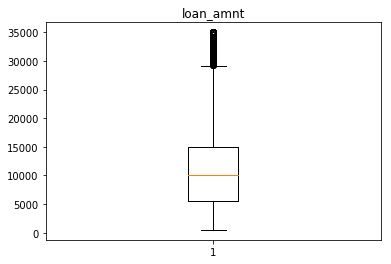

In [24]:
plt.title("loan_amnt")
plt.boxplot(loan1['loan_amnt'])
plt.show()

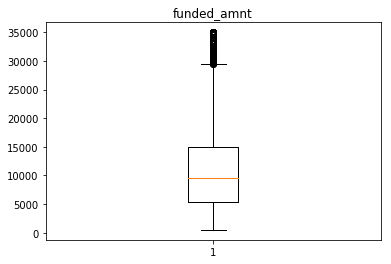

In [25]:
plt.title("funded_amnt")
plt.boxplot(loan1['funded_amnt'])
plt.show()

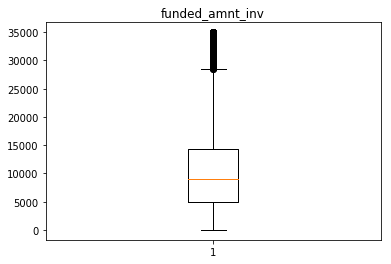

In [26]:
plt.title("funded_amnt_inv")
plt.boxplot(loan1['funded_amnt_inv'])
plt.show()

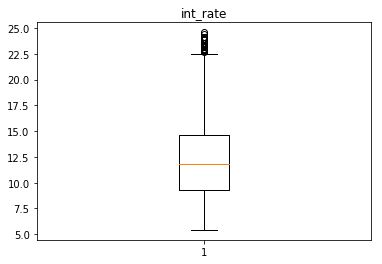

In [27]:
plt.title("int_rate")
plt.boxplot(loan1['int_rate'])
plt.show()

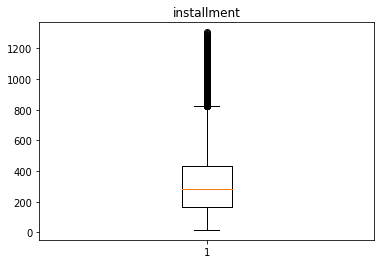

In [28]:
plt.title("installment")
plt.boxplot(loan1['installment'])
plt.show()

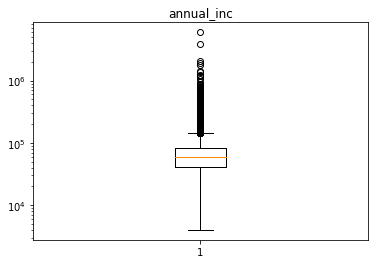

In [29]:
plt.title("annual_inc")
plt.boxplot(loan1['annual_inc'])
plt.yscale('log')
plt.show()

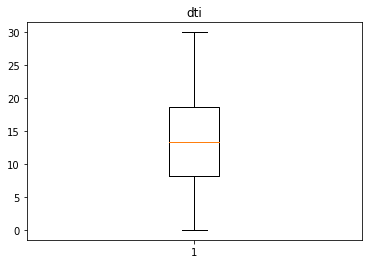

In [30]:
plt.title("dti")
plt.boxplot(loan1['dti'])
plt.show()

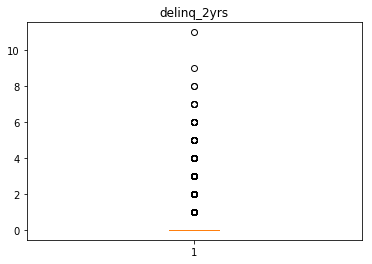

In [31]:
plt.title("delinq_2yrs")
plt.boxplot(loan1['delinq_2yrs'])
plt.show()

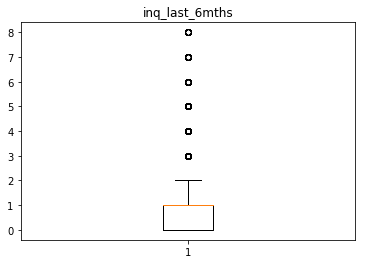

In [32]:
plt.title("inq_last_6mths")
plt.boxplot(loan1['inq_last_6mths'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce35333198>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce3505c400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce350643c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce3505ca20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce3505cf28>],
 'means': []}

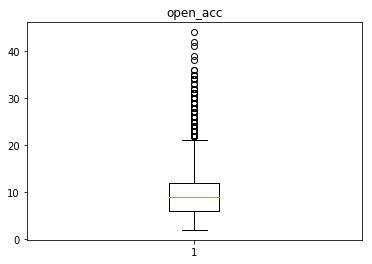

In [33]:
plt.title("open_acc")
plt.boxplot(loan1['open_acc'])

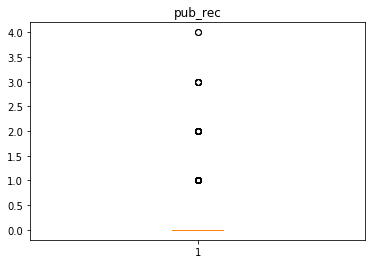

In [34]:
plt.title("pub_rec")
plt.boxplot(loan1['pub_rec'])
plt.show()

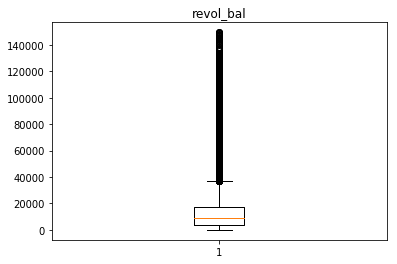

In [35]:
plt.title("revol_bal")
plt.boxplot(loan1['revol_bal'])
plt.show()

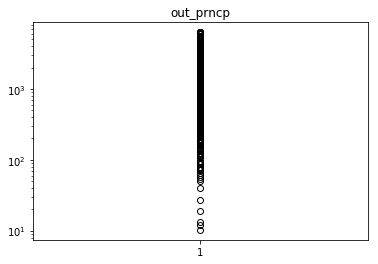

In [36]:
plt.title("out_prncp")
plt.boxplot(loan1['out_prncp'])
plt.yscale('log')
plt.show()

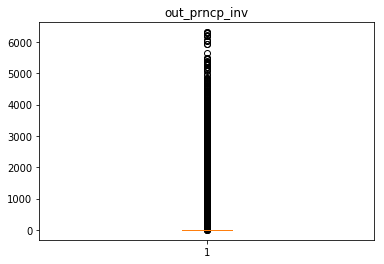

In [37]:
plt.title("out_prncp_inv")
plt.boxplot(loan1['out_prncp_inv'])
plt.show()

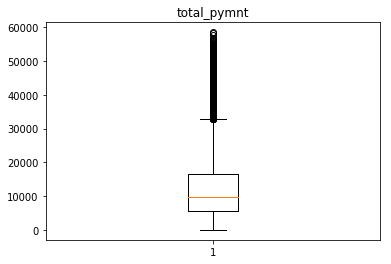

In [38]:
plt.title("total_pymnt")
plt.boxplot(loan1['total_pymnt'])
plt.show()

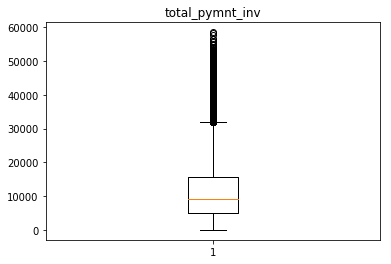

In [39]:
plt.title("total_pymnt_inv")
plt.boxplot(loan1['total_pymnt_inv'])
plt.show()

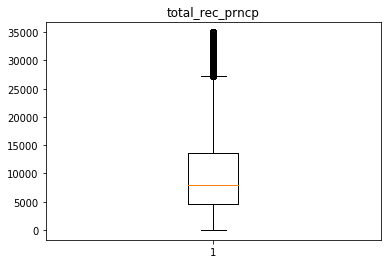

In [40]:
plt.title("total_rec_prncp")
plt.boxplot(loan1['total_rec_prncp'])
plt.show()

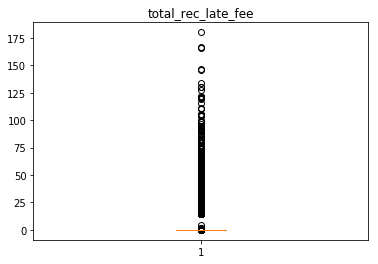

In [41]:
plt.title("total_rec_late_fee")
plt.boxplot(loan1['total_rec_late_fee'])
plt.show()

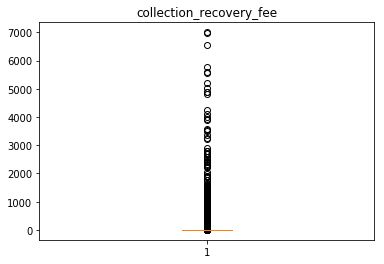

In [42]:
plt.title("collection_recovery_fee")
plt.boxplot(loan1['collection_recovery_fee'])
plt.show()

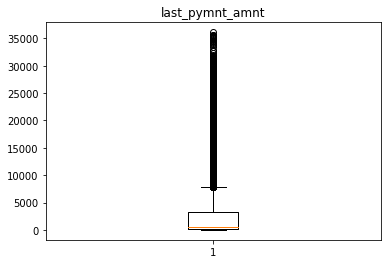

In [43]:
plt.title("last_pymnt_amnt")
plt.boxplot(loan1['last_pymnt_amnt'])
plt.show()

Below conclusions have been drawn from the above box plots.<br>
Loan_amnt is widely spread we are seeing few no.of outliers.These may not impact the analysis so we keep them as it is.<br>
funded_amnt and funded_amnt_inv are widely spread we are seeing few no.of outliers.These may not impact the analysis so we keep them as it is.<br>
int_rate is widely spread we are seeing few no.of outliers.These may not impact the analysis so we keep them as it is.<br>
dti has no outliers.<br>
most values of the fields delinq_2yrs and pub_rec are '0' that's why all the values are concentrated at '0' in boxplot.<br>
most values of inq-last_6mths are '0' and 1 that's why all the values are concentrated at '0' and 1 in boxplot.<br>
total_paymnt and total_paymnt_inv are widely spread and have good no.of outliers this is because loan_amount's wide distribution.<br>
total_rec_late_fee and collection_recovery_fee fields contain more no.of '0' values that's why it is concetrated ate 0 in boxplot so we can ignore the outliers here.<br>
out_prncp, out_prncp_inv fields can be ignored for removing the outliers as values of these are '0' for fully paid case.<br>

So we have annual_inc field which have more no.of outliers which may affect our analysis.<br> So let's remove all the values which are more than 95 percentile so that data becomes good for analysis.<br>Going beyond 95 percentile may loss the data that's why we will stick to remove the data which is more than 95 percentile

In [44]:
loan2 = loan1[loan1.annual_inc < loan1.annual_inc.quantile(0.95)]

In [45]:
loan2.shape

(37730, 49)

As we have removed outlier data let's draw the boxplot for annual_inc again

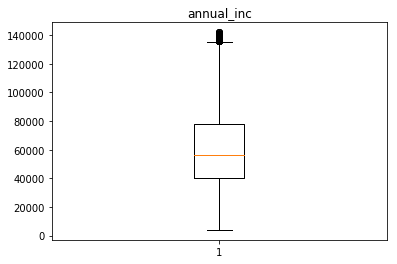

In [46]:
plt.title("annual_inc")
plt.boxplot(loan2['annual_inc'])
plt.show()

From above Boxplot we can say that there are less no.of outliers now

Let's now see the summary for all the quantitative columns

In [47]:
loan2_desc = loan2.describe()
loan2_desc

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,13267.000000,...,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37072.000000
mean,10845.205407,10591.084018,10059.287508,11.971601,313.851390,61043.976506,13.491069,0.144712,0.862152,36.010929,...,48.156433,11711.691312,11147.361959,9449.079201,2168.875508,1.330324,92.406357,11.833256,2565.365979,0.044400
std,7153.931580,6895.486242,6833.589787,3.697439,199.482913,27795.211362,6.668599,0.489490,1.063591,22.012502,...,357.649007,8631.594046,8533.476103,6757.665040,2477.658433,7.111493,670.687193,143.536764,4260.418582,0.206769
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5075.000000,5000.000000,5000.000000,8.940000,163.960000,40000.000000,8.400000,0.000000,0.000000,18.000000,...,0.000000,5478.801776,4989.350000,4499.992500,644.915000,0.000000,0.000000,0.000000,213.362500,0.000000
50%,9600.000000,9250.000000,8500.000000,11.830000,273.100000,56000.000000,13.630000,0.000000,1.000000,34.000000,...,0.000000,9571.946635,8989.455000,8000.000000,1304.605000,0.000000,0.000000,0.000000,523.450000,0.000000
75%,15000.000000,14575.000000,13952.765275,14.460000,412.045000,78000.000000,18.760000,0.000000,1.000000,52.000000,...,0.000000,15897.655000,15208.267500,12999.997500,2711.202500,0.000000,0.000000,0.000000,3164.062500,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,141996.000000,29.990000,11.000000,8.000000,120.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


So by observing the summary metrics for all the columns we are not seeing any unusual values.<br>
All the column's standard deviation is within limits so we can say that all are distributed well.<br>
Now let's jump to univariate analysis of categorical variables.

***Univariate analysis on categorical variables***

Let's draw simple count plots to understand the data distributions of categorical variables.

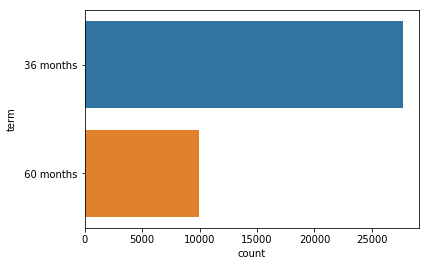

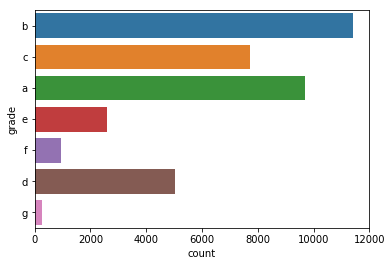

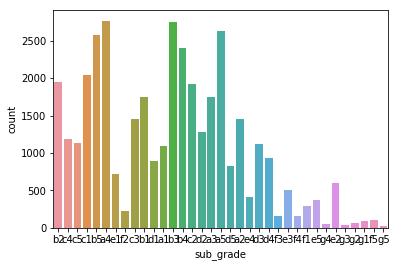

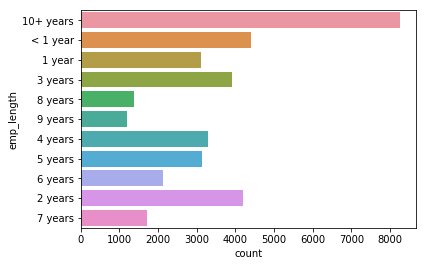

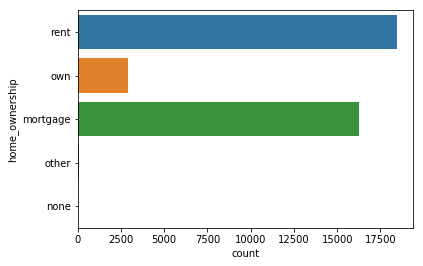

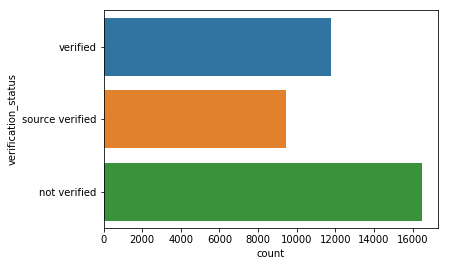

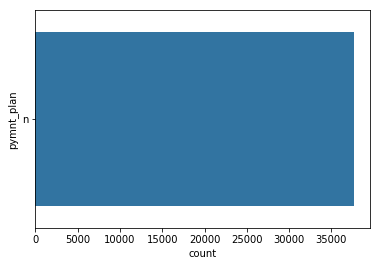

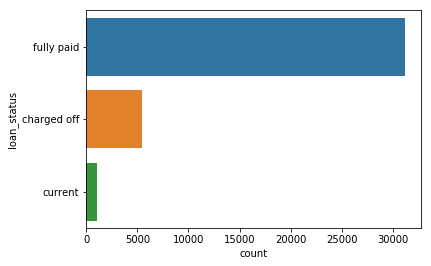

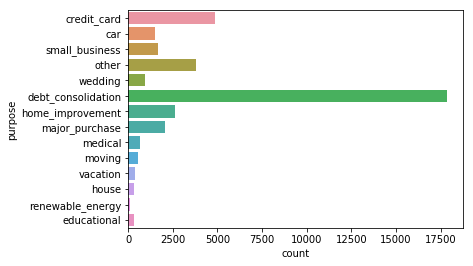

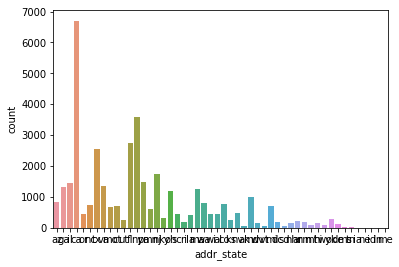

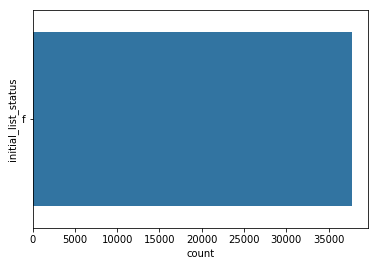

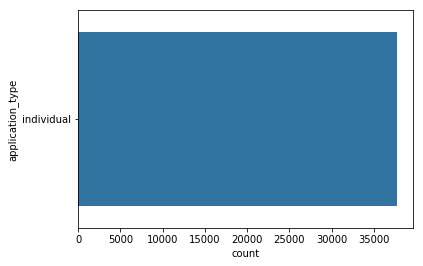

In [48]:
sns.countplot(y="term",data=loan2)
plt.show()

sns.countplot(y="grade",data=loan2)
plt.show()

sns.countplot(x="sub_grade",data=loan2)
plt.show()

sns.countplot(y="emp_length",data=loan2)
plt.show()

sns.countplot(y="home_ownership",data=loan2)
plt.show()

sns.countplot(y="verification_status",data=loan2)
plt.show()

sns.countplot(y="pymnt_plan",data=loan2)
plt.show()

sns.countplot(y="loan_status",data=loan2)
plt.show()

sns.countplot(y="purpose",data=loan2)
plt.show()

sns.countplot(x="addr_state",data=loan2)
plt.show()

sns.countplot(y="initial_list_status",data=loan2)
plt.show()

sns.countplot(y="application_type",data=loan2)
plt.show()

From above plots we can conclude below thngs:<br>
'loan_terms' are either 36 or 60 months out of which more loans are for 36 months term.<br>
Most of the loans fall under the grades 'a','b' and 'c'.<br>
Most of the loans of the datset are for 10+ years experienced people.<br>
Very less borrower's have own house.<br>
Considerable no.of charged-off's are there in the dataset.<br>
Most of the loans taken for the purpose of 'Debt consolidation'.<br>
All the applications of the dataset are for 'Individual' type.

***Derive Metrics***

Let's derive few new other metrics from the existing columns which will be useful for analysis.

Let's extract month and years from the date columns

In [49]:
loan2['issued_month'] = pd.DatetimeIndex(loan2['issue_date']).month
loan2['issued_year'] = pd.DatetimeIndex(loan2['issue_date']).year
loan2['last_pymnt_month'] = pd.DatetimeIndex(loan2['last_pymnt_date']).month
loan2['last_pymnt_year'] = pd.DatetimeIndex(loan2['last_pymnt_date']).year

C:\Users\Friends\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Friends\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Friends\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

Let's derive monthly salary for better analysis.

In [50]:
loan2['month_income'] = loan2['annual_inc']/12
loan2['month_income']

C:\Users\Friends\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0         2000.000000
1         2500.000000
2         1021.000000
3         4100.000000
4         6666.666667
5         3000.000000
6         3917.000000
7         4000.000000
8         3333.333333
9         1250.000000
10        6000.000000
11        6250.000000
12        2500.000000
13        1250.000000
14        8333.333333
15        2333.333333
16        3500.000000
17        9166.666667
18        7000.000000
19        6448.765833
20        3614.166667
21        8750.000000
22        4166.666667
23        4166.666667
24        6333.333333
25        7666.666667
26        5000.000000
27        4167.000000
28        8833.333333
29        2083.333333
             ...     
39680     3012.750000
39681     1666.666667
39682    10416.666667
39683     3333.333333
39684     5416.666667
39685     3750.000000
39686     5000.000000
39687     6250.000000
39689     1666.666667
39690     5000.000000
39691     4350.000000
39693     1125.000000
39695     7916.666667
39696     4000.000000
39697     

In [51]:
loan2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_date', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_date', 'last_pymnt_amnt', 'last_credit_pull_date',
       'application_type', 'pub_rec_bankruptcies', 'issued_month',
       'issued_year', 'last_pymnt_month', 'last_pymnt_year', 'month_income'],
      dtype='object')

***Segmented Univariate Analysis***

As we mainly focussing on analyzing the charge off's we can remove the records for which loan status is 'current'

In [52]:
loan3 = loan2[loan2.loan_status != 'current']
loan3['loan_status']

0         fully paid
1        charged off
2         fully paid
3         fully paid
5         fully paid
6         fully paid
7         fully paid
8        charged off
9        charged off
10        fully paid
11        fully paid
12       charged off
13        fully paid
14       charged off
15        fully paid
16        fully paid
17        fully paid
18        fully paid
19        fully paid
20        fully paid
21       charged off
22        fully paid
23        fully paid
24       charged off
25        fully paid
26       charged off
27       charged off
28        fully paid
29        fully paid
30        fully paid
            ...     
39680     fully paid
39681     fully paid
39682     fully paid
39683     fully paid
39684     fully paid
39685     fully paid
39686     fully paid
39687     fully paid
39689     fully paid
39690     fully paid
39691     fully paid
39693     fully paid
39695     fully paid
39696     fully paid
39697     fully paid
39698     fully paid
39699     ful

In [53]:
loan3.groupby('loan_status').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issued_month,issued_year,last_pymnt_month,last_pymnt_year,month_income
loan_status,,,,,,,,,,,,,,,,,,,,,
charged off,11811.923432,11484.400369,10620.343920,13.757598,327.956583,56473.144301,14.105207,0.168450,1.056827,36.267901,...,4.111962,643.264177,82.374309,320.483886,0.068764,7.316052,2010.365314,6.652645,2012.037951,4706.095358
fully paid,10487.515997,10255.171807,9768.577899,11.563126,309.127900,61672.142476,13.329698,0.140965,0.830976,35.926937,...,0.851555,0.000000,0.000000,3028.219560,0.040508,7.072050,2010.298535,6.468326,2012.841854,5139.345206


Let's draw Boxplots by grouping the data based on the loan_status and let's compare them to get the patterns.

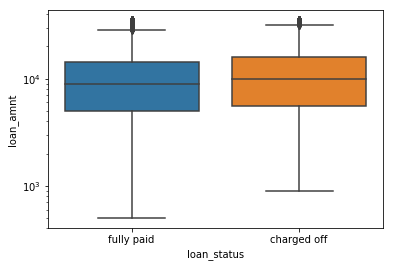

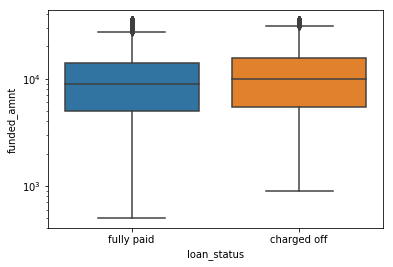

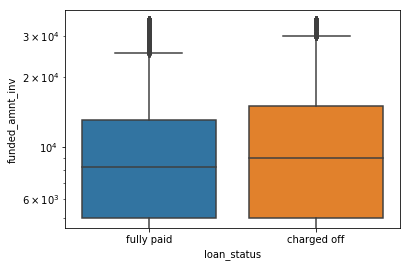

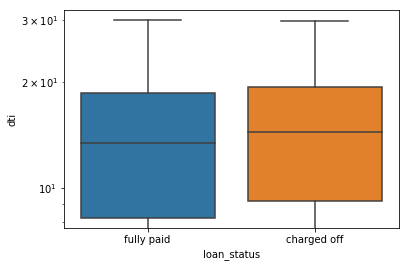

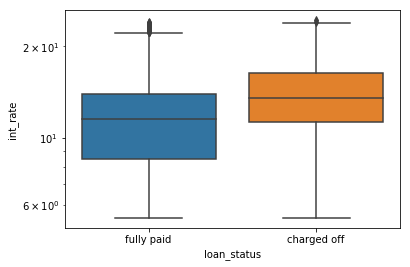

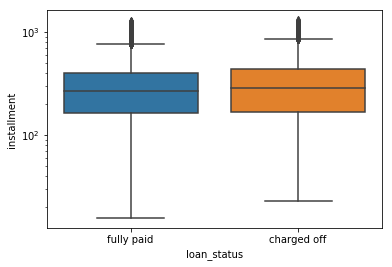

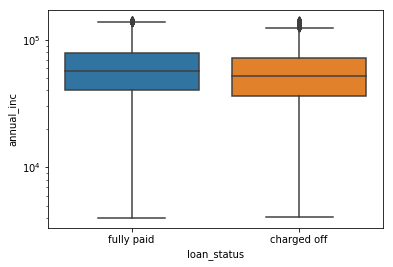

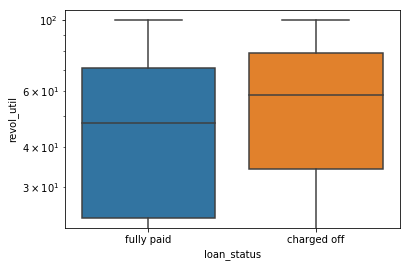

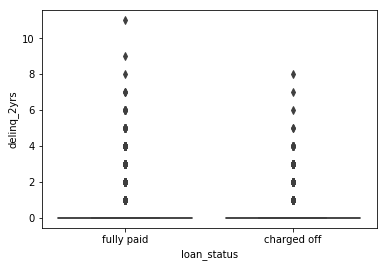

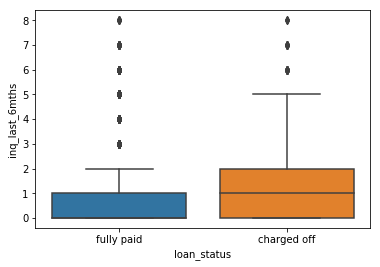

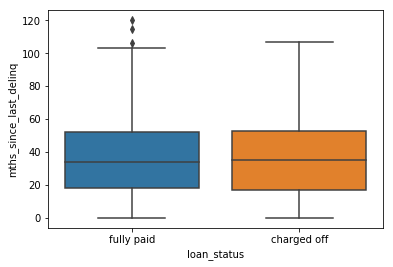

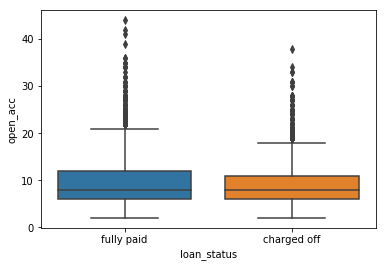

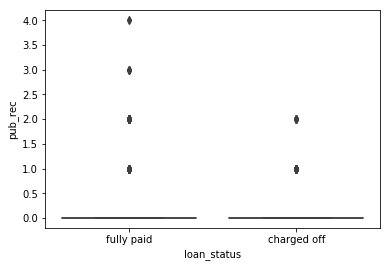

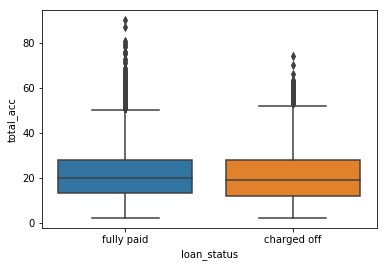

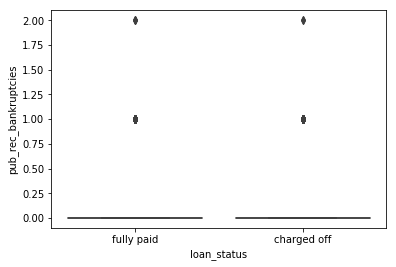

In [54]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='funded_amnt', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='funded_amnt_inv', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='dti', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='int_rate', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='installment', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='annual_inc', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='revol_util', data=loan3)
plt.yscale('log')
plt.show()

sns.boxplot(x='loan_status', y='delinq_2yrs', data=loan3)
plt.show()

sns.boxplot(x='loan_status', y='inq_last_6mths', data=loan3)
plt.show()

sns.boxplot(x='loan_status', y='mths_since_last_delinq', data=loan3)
plt.show()

sns.boxplot(x='loan_status', y='open_acc', data=loan3)
plt.show()

sns.boxplot(x='loan_status', y='pub_rec', data=loan3)
plt.show()

sns.boxplot(x='loan_status', y='total_acc', data=loan3)
plt.show()

sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=loan3)
plt.show()

*Conclusions from the above boxplots*:<br>
1. From boxplot we can observe that Loan_amount and Funded_amount are little higher in the case of defaulters
2. Debt-to-income ratio's median is slight higher for defaulter's so DTI might be a factor i.e more the dti then more the chance of defaulting the loan.<br>
3. Int rate is clearly showing to be higher for charged off's. So more the interest rates then more the chance of a loan to be getting defaulted.<br>
4. Annual_income is also looks to be lower for the defaulter's as per the boxplot.But it is very less variation.<br>
5. revolving_utility is higher for charged off's.<br>
6. 'Inquiry in last 6 months' is also differing for 'fully paid' and 'charged off's'.Customers who are having more than 1 inquiry in past 6 months are defaulting more.

Let's try to prove the above conclusions mathematically by calculating means,medians, 75th and 95th percentiles

In [55]:
loan3.groupby('loan_status').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issued_month,issued_year,last_pymnt_month,last_pymnt_year,month_income
loan_status,,,,,,,,,,,,,,,,,,,,,
charged off,11811.923432,11484.400369,10620.343920,13.757598,327.956583,56473.144301,14.105207,0.168450,1.056827,36.267901,...,4.111962,643.264177,82.374309,320.483886,0.068764,7.316052,2010.365314,6.652645,2012.037951,4706.095358
fully paid,10487.515997,10255.171807,9768.577899,11.563126,309.127900,61672.142476,13.329698,0.140965,0.830976,35.926937,...,0.851555,0.000000,0.000000,3028.219560,0.040508,7.072050,2010.298535,6.468326,2012.841854,5139.345206


In [56]:
loan3.groupby('loan_status').quantile(0.75)

0.75,annual_inc,collection_recovery_fee,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,issued_month,...,pub_rec_bankruptcies,recoveries,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
loan_status,,,,,,,,,,,,,,,,,,,,,
charged off,71525.0,8.8975,0.0,19.4025,15600.0,14975.0,2.0,441.9700,16.32,10.0,...,0.0,571.545,16795.75,78.8,28.0,8940.482500,8337.6475,2710.3375,0.0,5219.8725
fully paid,79000.0,0.0000,0.0,18.5900,14000.0,13100.0,1.0,404.6575,13.98,10.0,...,0.0,0.000,16049.00,70.6,28.0,16435.165462,15682.4025,2528.9625,0.0,14000.0000


In [57]:
loan3.groupby('loan_status').quantile(0.95)

0.95,annual_inc,collection_recovery_fee,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,issued_month,...,pub_rec_bankruptcies,recoveries,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
loan_status,,,,,,,,,,,,,,,,,,,,,
charged off,110000.0,420.56379,1.0,23.95,25000.0,24950.0,3.0,772.290,19.91,12.0,...,1.0,2654.991,38100.00,95.4,42.0,19581.649500,18905.508,7194.9945,29.896004,11635.538
fully paid,119000.0,0.00000,1.0,23.83,24000.0,23700.0,3.0,697.215,17.58,12.0,...,0.0,0.000,36616.75,93.0,43.0,29314.954992,28670.205,6451.9750,0.000000,24000.000


From above calculations we can conclude that all the inferences made from the Boxplots are proved mathematically.

Also one more variable slightly showing variation between charged off and fully paid cases.<br>
That field is 'public_record_bankruptcies'. We can observe slight variation in this field from the calculations

Let's look into few more fields and find the driving factors for the charge off's

Let's calculate %of charge off's issued_month wise

In [58]:
l1 = (((loan3[loan3.loan_status == 'charged off']).groupby('issued_month').id.count())/(loan3.groupby('issued_month').id.count()))*100
l1

issued_month
1     13.706479
2     12.522202
3     12.881754
4     13.269443
5     16.248207
6     15.361646
7     14.276789
8     13.983841
9     16.180935
10    15.454288
11    15.179272
12    16.322468
Name: id, dtype: float64

No significance variation in % of charge off's when analyzed it issued_month wise

Let's calculate %of charge off's by grouping based on 'Purpose'

In [59]:
l2 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('purpose').id.count())/(loan3.groupby('purpose').id.count()))*100
l2

,id
purpose,
car,10.965517
credit_card,10.844129
debt_consolidation,15.469932
educational,17.307692
home_improvement,12.578125
house,16.272189
major_purchase,10.595703
medical,16.224649
moving,16.363636


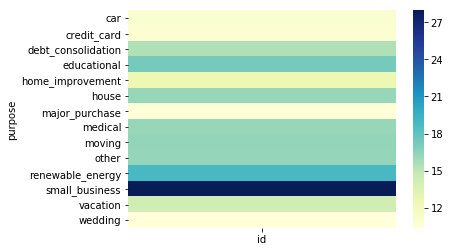

In [60]:
sns.heatmap(l2,cmap="YlGnBu")

From above we can say that loans taken for the purposes 'Small business','renewable energy' and 'education' are defaulted most

Let's calculate %of charge off's by grouping based on 'grade'

In [61]:
l3 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('grade').id.count())/(loan3.groupby('grade').id.count()))*100
l3

,id
grade,
a,6.142532
b,12.399820
c,17.704436
d,22.348563
e,26.960784
f,32.618510
g,36.259542


In [62]:
l4 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('sub_grade').id.count())/(loan3.groupby('sub_grade').id.count()))*100
l4

,id
sub_grade,
a1,2.732240
a2,5.092911
a3,5.882353
a4,6.286337
a5,8.192308
b1,9.656777
b2,11.421053
b3,12.274096
b4,13.692769


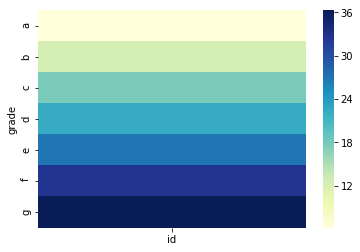

In [63]:
sns.heatmap(l3,cmap="YlGnBu")

From above we can say that as grade lowers default rate is also increasing

Let's calculate %of charge off's by grouping based on fields like 'addr_state','sub_grade','emp_length','home_ownership',<br>
'verification_status' etc

In [64]:
l5 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('addr_state').id.count())/(loan3.groupby('addr_state').id.count()))*100
l5.sort_values('id')

,id
addr_state,
wy,5.000000
dc,6.666667
ms,10.526316
de,11.009174
vt,11.320755
ar,11.353712
tn,11.764706
tx,11.909568
ks,12.244898


In [65]:
l6 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('sub_grade').id.count())/(loan3.groupby('sub_grade').id.count()))*100
l6.sort_values('id')

,id
sub_grade,
a1,2.732240
a2,5.092911
a3,5.882353
a4,6.286337
a5,8.192308
b1,9.656777
b2,11.421053
b3,12.274096
b4,13.692769


In [66]:
l7 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('emp_length').id.count())/(loan3.groupby('emp_length').id.count()))*100
l7

,id
emp_length,
1 year,14.735806
10+ years,16.094285
2 years,13.356081
3 years,14.013072
4 years,13.835103
5 years,14.478004
6 years,14.210019
7 years,15.328467
8 years,14.434524


In [67]:
l8 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('home_ownership').id.count())/(loan3.groupby('home_ownership').id.count()))*100
l8

,id
home_ownership,
mortgage,13.992609
none,NaN
other,18.279570
own,15.212057
rent,15.377364


In [68]:
l9 = pd.DataFrame(((loan3[loan3.loan_status == 'charged off']).groupby('verification_status').id.count())/(loan3.groupby('verification_status').id.count()))*100
l9

,id
verification_status,
not verified,12.876090
source verified,14.989083
verified,17.364203


So from above we can say that sub grade is a driving factor

***Ending of segmented univariate analysis***<br>
*Below are the final conclusions*<br>
Here are the major driving factors of loan default.<br>
1. Debt to Income ratio<br>
2. Interest rate <br>
3. Revolving_utility <br>
4. Grade given to customer based on credit score<br>
5. Purpose of the loan<br>
Minor factors are<br>
5. Annual_income<br>
6. Inquiry in last 6 months<br>
7. Public recorded bankruptcies

***Bi variate Analysis***

In previous section i.e segmented univariate analysis section itself we have covered bi-variate analysis for few categorical variables.

Now let's find the co relation between the all numeric variables in the Dataset

In [69]:
cor = loan3[loan3['loan_status'] == 'fully paid'].corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issued_month,issued_year,last_pymnt_month,last_pymnt_year,month_income
loan_amnt,1.000,0.982,0.944,0.273,0.933,0.400,0.090,-0.039,-0.003,0.022,...,0.016,NaN,NaN,0.545,-0.036,0.045,0.100,-0.006,0.108,0.400
funded_amnt,0.982,1.000,0.961,0.280,0.959,0.396,0.090,-0.039,-0.002,0.021,...,0.018,NaN,NaN,0.549,-0.036,0.033,0.111,-0.011,0.107,0.396
funded_amnt_inv,0.944,0.961,1.000,0.272,0.912,0.382,0.097,-0.045,-0.013,0.076,...,0.003,NaN,NaN,0.535,-0.040,0.056,0.236,-0.000,0.193,0.382
int_rate,0.273,0.280,0.272,1.000,0.259,0.055,0.117,0.162,0.133,-0.062,...,0.069,NaN,NaN,0.241,0.079,0.010,0.004,-0.014,0.092,0.055
installment,0.933,0.959,0.912,0.259,1.000,0.391,0.082,-0.027,-0.003,0.008,...,0.029,NaN,NaN,0.460,-0.031,0.022,0.050,-0.005,0.019,0.391
annual_inc,0.400,0.396,0.382,0.055,0.391,1.000,-0.078,0.033,0.031,-0.002,...,-0.005,NaN,NaN,0.223,-0.010,0.015,0.047,-0.004,0.008,1.000
dti,0.090,0.090,0.097,0.117,0.082,-0.078,1.000,-0.026,0.011,0.067,...,-0.012,NaN,NaN,0.038,-0.002,0.011,0.091,0.013,0.114,-0.078
delinq_2yrs,-0.039,-0.039,-0.045,0.162,-0.027,0.033,-0.026,1.000,0.012,-0.564,...,0.027,NaN,NaN,-0.011,0.003,-0.011,-0.007,0.001,-0.007,0.033
inq_last_6mths,-0.003,-0.002,-0.013,0.133,-0.003,0.031,0.011,0.012,1.000,-0.004,...,0.023,NaN,NaN,0.043,0.015,0.008,-0.059,-0.011,-0.058,0.031
mths_since_last_delinq,0.022,0.021,0.076,-0.062,0.008,-0.002,0.067,-0.564,-0.004,1.000,...,-0.033,NaN,NaN,0.014,0.015,0.049,0.137,0.030,0.101,-0.002


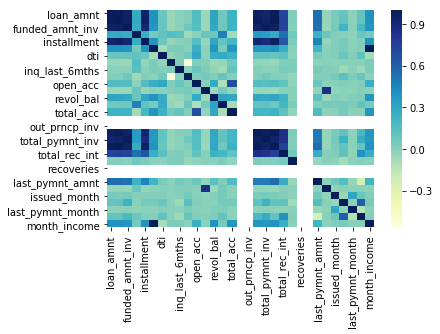

In [87]:
sns.heatmap(cor,cmap="YlGnBu")

From above we can say that the fields 'loan_amnt','loan_amnt_inv','funded_amnt','installment' are positively correlated.<br>
'loan amount' and 'oustanding principle' are positively corelated.<br>

Now let's do the Bi variate analysis of categorical variables.

In [78]:
loan_co = loan3[loan3.loan_status == 'charged off']
B1 = (pd.pivot_table(loan_co, values='id', index='purpose', columns='grade', aggfunc='count'))/(pd.pivot_table(loan3, values='id', index='purpose', columns='grade', aggfunc='count'))*100
B1

grade,a,b,c,d,e,f,g
purpose,,,,,,,
car,5.498282,12.168142,15.652174,19.834711,13.207547,40.000000,50.000000
credit_card,4.589193,9.324759,14.285714,16.697588,23.849372,22.727273,15.000000
debt_consolidation,6.330128,11.830611,17.093784,22.243639,27.220217,36.078431,36.805556
educational,5.063291,20.833333,15.730337,30.000000,42.857143,33.333333,NaN
home_improvement,4.561003,11.718750,20.219780,22.352941,20.833333,25.000000,7.692308
house,3.157895,9.782609,20.967742,26.086957,37.037037,50.000000,50.000000
major_purchase,4.671717,9.009009,15.890411,22.522523,22.352941,8.000000,25.000000
medical,6.122449,15.873016,23.200000,24.358974,21.052632,33.333333,66.666667
moving,10.365854,20.000000,14.414414,20.312500,29.166667,11.111111,33.333333


In [79]:
B2 = (pd.pivot_table(loan_co, values='id', index='inq_last_6mths', columns='grade', aggfunc='count'))/(pd.pivot_table(loan3, values='id', index='inq_last_6mths', columns='grade', aggfunc='count'))*100
B2

grade,a,b,c,d,e,f,g
inq_last_6mths,,,,,,,
0,5.438596,11.445987,14.866349,19.575937,25.357483,30.903790,33.628319
1,6.186924,12.354395,18.826310,22.315789,27.983539,35.361217,41.095890
2,7.418398,13.125000,18.029197,24.177072,28.780488,30.601093,25.000000
3,10.663984,16.460905,22.040816,29.956897,27.888446,35.106383,53.571429
4,10.743802,19.658120,26.315789,36.363636,33.333333,NaN,NaN
5,NaN,27.083333,31.034483,36.363636,NaN,NaN,NaN
6,50.000000,8.695652,31.818182,57.142857,33.333333,NaN,NaN
7,NaN,37.500000,29.411765,33.333333,NaN,NaN,NaN
8,NaN,100.000000,33.333333,NaN,NaN,100.000000,NaN


In [80]:
B3 = (pd.pivot_table(loan_co, values='id', index='inq_last_6mths', columns='purpose', aggfunc='count'))/(pd.pivot_table(loan3, values='id', index='inq_last_6mths', columns='purpose', aggfunc='count'))*100
B3

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
inq_last_6mths,,,,,,,,,,,,,,
0,8.273894,9.119131,12.744413,15.200000,9.785648,14.285714,9.738956,12.040134,14.741036,13.597734,21.568627,26.573427,13.186813,8.539326
1,13.399504,12.509713,16.762413,13.580247,12.732475,13.861386,10.416667,18.857143,15.853659,18.458418,19.230769,29.742389,13.131313,9.053498
2,10.526316,12.541254,19.028175,15.942029,13.817330,16.129032,13.504823,19.444444,15.555556,16.753927,7.692308,24.902724,20.833333,14.876033
3,16.513761,14.925373,22.643030,35.714286,20.074349,21.311475,9.790210,25.000000,26.315789,23.248408,20.000000,29.166667,15.625000,16.216216
4,33.333333,10.714286,9.411765,33.333333,13.043478,40.000000,12.500000,NaN,60.000000,23.404255,NaN,30.000000,NaN,28.571429
5,25.000000,10.000000,8.888889,50.000000,20.000000,NaN,25.000000,50.000000,NaN,20.000000,NaN,53.333333,NaN,NaN
6,NaN,20.000000,25.000000,NaN,20.000000,33.333333,100.000000,NaN,NaN,20.000000,NaN,57.142857,NaN,NaN
7,50.000000,50.000000,25.000000,NaN,12.500000,25.000000,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,100.000000
8,NaN,NaN,100.000000,NaN,33.333333,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN


Let's draw heat maps for above

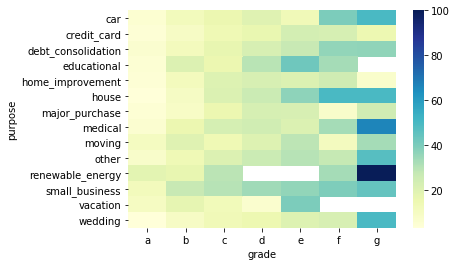

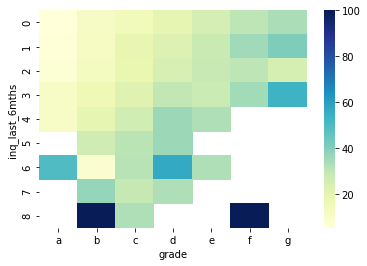

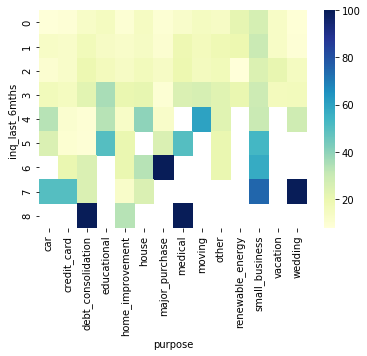

In [84]:
sns.heatmap(B1,cmap="YlGnBu")
plt.show()

sns.heatmap(B2,cmap="YlGnBu")
plt.show()

sns.heatmap(B3,cmap="YlGnBu")
plt.show()

So we can conclude that combinations of 'purpose','grade' and 'inquiry in last 6 months' are major factors for the loan default

***END OF THE ASSIGNMENT***